## 6.5 Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

# 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# disabling deprecation warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = "C:/Users/kevan/Documents/Career Foundry/Data Immersion/Achievement 6/Final Project"

In [5]:
# importing dataframe
df = pd.read_csv(r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 6\Final Project\Data\Prepared Data\df_clean.csv', index_col = 0)

In [6]:
df.shape

(12852, 49)

In [7]:
# setting max columns to see all in df

pd.set_option('display.max_columns', 50)

In [8]:
# setting max rows to see all in df

pd.set_option('display.max_rows', 160)

In [9]:
# renaming columns

df.rename(columns = {'Income_Limit': 'bbce_Income_Lmt', 'bbce_assetlmt_eliminated' : 'bbce_ast_elim', 'bbce_assetlmt_1kdollars': 'bbce_ast_1k', 'CAP_for_SSI': 'CAP_SSI', 'Average_Months_Certification': 'Avg_Mo_Earn', 'Median_Months_Certification': 'Med_Mo_Earn', 'Average_Months_Elderly' : 'Avg_Mo_Elderly', 'Median_Months_Elderly' : 'Med_Mo_Elderly', 'Average_Months_Nonearning' : 'Avg_Mo_Nonearning', 'Median_Months_Nonearning' : 'Med_Mo_Nonearning', 'Int_Face_Interview_Waiver' : 'Phone_Initial', 'Recert_Face_Interview_Waiver': 'Phone_Recert', 'All_Elig_Noncitizen_Adult' : 'All_Non_Adult', 'Some_Elig_Noncitizen_Adult' : 'Some_Non_Adult', 'All_Elig_Noncitizen_Child' : 'All_Non_Child', 'Some_Elig_Noncitizen_Child' : 'Some_Non_Child', 'All_Elig_Noncitizen_Elderly' : 'All_Non_Elderly', 'Some_Elig_Noncitizen_Elderly' : 'Some_Non_Elderly'}, inplace = True)

In [10]:
df.head()

,State,Year,Month,bbce,bbce_Income_Lmt,bbce_ast_elim,bbce_ast_1k,bbce_vehicle,bbce_household,bbce_senior_disabled,call_center,CAP_SSI,1to3_earn,4to6_earn,7to12_earn,13mo_earn,Avg_Mo_Earn,Med_Mo_Earn,1to3_elderly,4to6_elderly,7to12_elderly,13mo_elderly,Avg_Mo_Elderly,Med_Mo_Elderly,1to3_nonearn,4to6_nonearn,7to12_nonearn,13mo_nonearn,Avg_Mo_Nonearning,Med_Mo_Nonearning,%dollar_EBT,Phone_Initial,Phone_Recert,fingerprint,All_Non_Adult,Some_Non_Adult,All_Non_Child,Some_Non_Child,All_Non_Elderly,Some_Non_Elderly,Online_Application,outreach_spend,Simple_Reporting_Option,Transitional_Benefits,Exclude_All_Vehicles,High_Vehicle_Exemption,Exclude_OnePlus_Vehicles,EBT category,Fingerprint requirement
0,Alabama,1996,1,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.007937,0.080853,0.911210,0.0,11.313845,12.0,0.007576,0.046903,0.945521,0.0,11.633732,12.0,0.050756,0.360505,0.588739,0.0,9.023605,9.500000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
1,Alabama,1996,2,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.007937,0.074186,0.917877,0.0,11.373845,12.0,0.007576,0.047391,0.945034,0.0,11.630808,12.0,0.049486,0.351775,0.598739,0.0,9.120906,10.416667,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
2,Alabama,1996,3,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.005051,0.068414,0.926535,0.0,11.425072,12.0,0.007576,0.025168,0.967256,0.0,11.764141,12.0,0.050330,0.360387,0.589283,0.0,9.027948,10.416667,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
3,Alabama,1996,4,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.010259,0.075030,0.914711,0.0,11.350606,12.0,0.007576,0.016835,0.975589,0.0,11.830808,12.0,0.048053,0.358938,0.593009,0.0,9.115215,11.250000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
4,Alabama,1996,5,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.010259,0.067784,0.921957,0.0,11.379592,12.0,0.000000,0.009259,0.990741,0.0,11.924837,12.0,0.041038,0.363640,0.595322,0.0,9.174034,11.250000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required


In [11]:
# creating a subset of the data with numeric variables to use in k means analysis

df_kmeans = df[['1to3_earn', '4to6_earn', '7to12_earn', '13mo_earn', 'Avg_Mo_Earn', 'Med_Mo_Earn', '1to3_elderly', '4to6_elderly', '7to12_elderly', '13mo_elderly', 'Avg_Mo_Elderly', 'Med_Mo_Elderly', '1to3_nonearn', '4to6_nonearn', '7to12_nonearn', '13mo_nonearn', 'Avg_Mo_Nonearning', 'Med_Mo_Nonearning', '%dollar_EBT', 'outreach_spend']]

In [12]:
# check for null values

df_kmeans.isnull().sum()

1to3_earn            153
4to6_earn            153
7to12_earn           153
13mo_earn            153
Avg_Mo_Earn          153
Med_Mo_Earn          153
1to3_elderly         153
4to6_elderly         153
7to12_elderly        153
13mo_elderly         153
Avg_Mo_Elderly       153
Med_Mo_Elderly       153
1to3_nonearn         153
4to6_nonearn         153
7to12_nonearn        153
13mo_nonearn         153
Avg_Mo_Nonearning    153
Med_Mo_Nonearning    153
%dollar_EBT            0
outreach_spend       153
dtype: int64

In [13]:
# dropping null values. these values represent data that was not available at time of collection

df_kmeans.dropna(inplace=True)

In [14]:
# verify null values dropped

df_kmeans.isnull().sum()

1to3_earn            0
4to6_earn            0
7to12_earn           0
13mo_earn            0
Avg_Mo_Earn          0
Med_Mo_Earn          0
1to3_elderly         0
4to6_elderly         0
7to12_elderly        0
13mo_elderly         0
Avg_Mo_Elderly       0
Med_Mo_Elderly       0
1to3_nonearn         0
4to6_nonearn         0
7to12_nonearn        0
13mo_nonearn         0
Avg_Mo_Nonearning    0
Med_Mo_Nonearning    0
%dollar_EBT          0
outreach_spend       0
dtype: int64

# 2. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_kmeans).score(df_kmeans) for i in range(len(kmeans))]
score

[-217217777.687088,
 -90051078.74954931,
 -36758000.066670686,
 -21876825.551082566,
 -15160201.942298565,
 -9736263.287830953,
 -7012763.990170272,
 -5800721.419018442,
 -4752642.62572967]

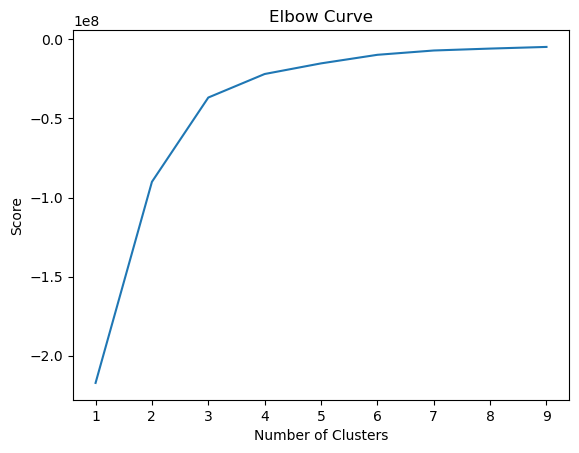

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  There's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal cluster count is four.

# 3. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_kmeans)

KMeans(n_clusters=4)

In [20]:
# creating column with cluster assignment to each row

df_kmeans['clusters'] = kmeans.fit_predict(df_kmeans)

In [21]:
df_kmeans.head()

,1to3_earn,4to6_earn,7to12_earn,13mo_earn,Avg_Mo_Earn,Med_Mo_Earn,1to3_elderly,4to6_elderly,7to12_elderly,13mo_elderly,Avg_Mo_Elderly,Med_Mo_Elderly,1to3_nonearn,4to6_nonearn,7to12_nonearn,13mo_nonearn,Avg_Mo_Nonearning,Med_Mo_Nonearning,%dollar_EBT,outreach_spend,clusters
0,0.007937,0.080853,0.911210,0.0,11.313845,12.0,0.007576,0.046903,0.945521,0.0,11.633732,12.0,0.050756,0.360505,0.588739,0.0,9.023605,9.500000,0.0,0.0,0
1,0.007937,0.074186,0.917877,0.0,11.373845,12.0,0.007576,0.047391,0.945034,0.0,11.630808,12.0,0.049486,0.351775,0.598739,0.0,9.120906,10.416667,0.0,0.0,0
2,0.005051,0.068414,0.926535,0.0,11.425072,12.0,0.007576,0.025168,0.967256,0.0,11.764141,12.0,0.050330,0.360387,0.589283,0.0,9.027948,10.416667,0.0,0.0,0
3,0.010259,0.075030,0.914711,0.0,11.350606,12.0,0.007576,0.016835,0.975589,0.0,11.830808,12.0,0.048053,0.358938,0.593009,0.0,9.115215,11.250000,0.0,0.0,0
4,0.010259,0.067784,0.921957,0.0,11.379592,12.0,0.000000,0.009259,0.990741,0.0,11.924837,12.0,0.041038,0.363640,0.595322,0.0,9.174034,11.250000,0.0,0.0,0


In [22]:
# value counts for each cluster

df_kmeans['clusters'].value_counts()

clusters
0    11049
2     1242
1      348
3       60
Name: count, dtype: int64

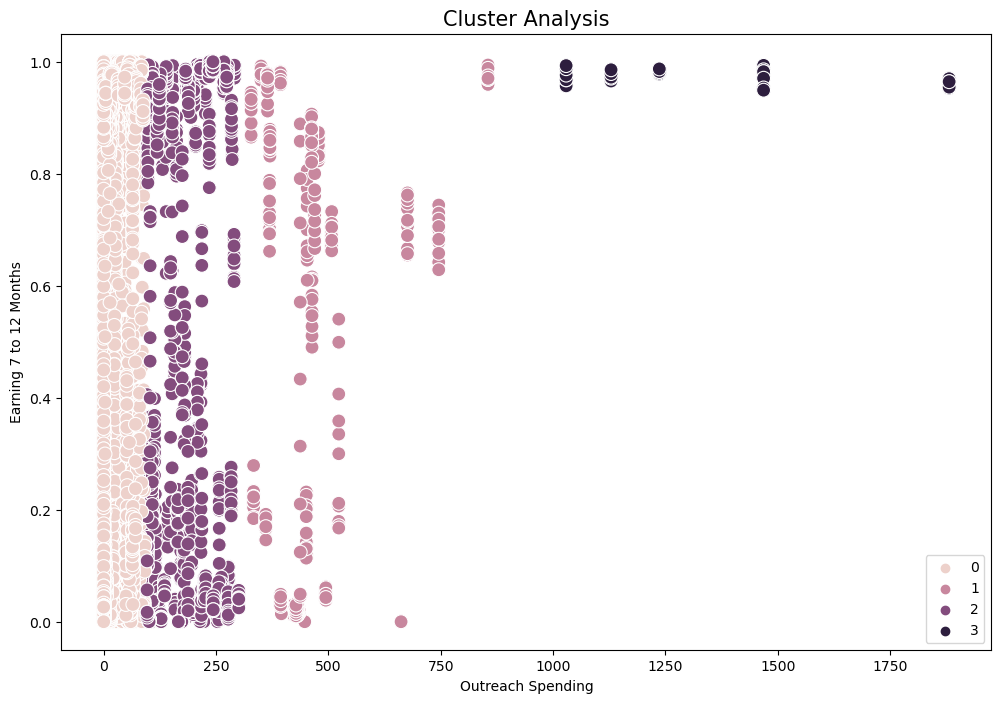

In [26]:
# `hue` assigns kmeans label to values
# `s` represents the size of the points you want to see in the plot.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['outreach_spend'], y=df_kmeans['7to12_earn'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.title('Cluster Analysis', fontsize=15)
plt.xlabel('Outreach Spending') # Label x-axis.
plt.ylabel('Earning 7 to 12 Months') # Label y-axis.
plt.show()

### The lighter purple group represents data points for California where outreach spending was highest among all states. This was confirmed against the raw data.

In [24]:
# labeling each cluster color

df_kmeans.loc[df_kmeans['clusters'] == 3, 'cluster'] = 'dark purple'
df_kmeans.loc[df_kmeans['clusters'] == 2, 'cluster'] = 'purple'
df_kmeans.loc[df_kmeans['clusters'] == 1, 'cluster'] = 'pink'
df_kmeans.loc[df_kmeans['clusters'] == 0, 'cluster'] = 'light pink'

In [25]:
# Calculating mean and median for specified columns and the clusters found within those columns

df_kmeans.groupby('cluster').agg({'outreach_spend':['mean', 'median'], 
                         '7to12_earn':['mean', 'median'], 
                         '7to12_nonearn':['mean', 'median'],
                          '7to12_elderly':['mean', 'median']})

outreach_spend              7to12_earn           7to12_nonearn  \
                      mean       median       mean    median          mean   
cluster                                                                      
dark purple    1348.816626  1236.392456   0.972641  0.975406      0.954271   
light pink       11.948679     0.000000   0.479488  0.384724      0.523270   
pink            465.511202   437.308350   0.473469  0.613530      0.404877   
purple          170.963360   164.064995   0.509740  0.444983      0.502100   

                      7to12_elderly            
               median          mean    median  
cluster                                        
dark purple  0.952288      0.593301  0.597365  
light pink   0.502833      0.621117  0.722963  
pink         0.411692      0.309258  0.298028  
purple       0.483583      0.544195  0.645189

### Outreach spending was highest in the purple cluster and the lowest in the light pink cluster.

### Earning had the highest average and median proportion (purple) and elderly had the lowest average and median (pink).

### There are three clusters within each group of individuals regardless of recertification period (light pink, pink, dark purple). This is likely indicating earning, nonearning, and elderly.

# 4. Exporting Visuals

In [27]:
ax.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'cluster.png'))